# Accompying Notebook for my_gui_manual_edition

In [1]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt 
#from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas

In [ ]:
pdw_anom = list(['INST', 'LIN', 'LIN-GRP', 'LS-IND', 'LS-MELO', 'LS-MIFE', 'MELO-MIFE', 'pLS-IND'])
pdw_ctn = list([100, 3, 3, 9, 68, 234, 1, 4])

In [ ]:
pdw_1 = {'pdw_anom': pdw_anom, 'pdw_ctn': pdw_ctn}

In [ ]:
pdw_1

In [ ]:
pdw_2 = pd.DataFrame(pdw_1)

In [ ]:
pdw_2

In [ ]:
pdw_2.to_csv('pdw_anom_ctn.csv')

In [ ]:
sns.set_style("darkgrid")
figure_tmp_available_features = plt.Figure(figsize=(7, 5), dpi=65, facecolor=(1, 1, 1), edgecolor=(0, 0, 0))

In [ ]:
def add_figure_available_features_window(fig):
    canvas_feature_overview = FigureCanvas(fig)

In [ ]:
add_figure_available_features_window(figure_tmp_available_features)

In [ ]:
axf1 = figure_tmp_available_features.add_subplot(111)

In [ ]:
axf1

In [ ]:
import numpy as np
import pandas as pd
import plotly.offline as pyo
#pyo.init_notebook_mode()
# create fake data:
df = pd.DataFrame(np.random.randn(100,4),columns='A B C D'.split())
pyo.iplot([{
'x': df.index,
'y': df[col],
'name': col
} for col in df.columns])


### Read the two csv-files by hand...

In [2]:
def load_csv_file():
    repo_path = '/Users/joerg/repos/development/'
    repo_dir = 'my_gui_manual_edition'
    current_csv_file = "saved_feature_overview_12_05_2022.csv"
    path_csv_file = os.path.join(repo_path, repo_dir, current_csv_file)
    
    overview_available_features = pd.read_csv(path_csv_file).drop(['Unnamed: 0'], axis=1)
    overview_available_features['project_number'] = overview_available_features['project_number'].astype(str)
    overview_available_features['feature'] = overview_available_features['feature'].str.lower()
    return overview_available_features

In [3]:
overview_available_features = load_csv_file()

In [4]:
any_anom_type = list(overview_available_features['feature'].unique())
any_line = list(overview_available_features['lineshort'].unique())


In [5]:
any_anom_type.insert(0, 'All Features')

In [ ]:
any_anom_type

In [ ]:
clicked_item = 'crac'

In [ ]:
any_line

In [8]:
single_item_clicked = "30305306"

In [9]:
overview_available_features[overview_available_features['lineshort'] == single_item_clicked]['feature']

71    pife-notc
72         mife
73    melo-corr
74           ls
75         noth
76        unkwn
77      ls-mife
78         inst
79      ls-melo
80        other
81       ls-ind
82      pls-ind
83          lin
84      lin-grp
85    melo-mife
Name: feature, dtype: object

In [10]:
uploaded_feature_df = pd.read_csv('uploaded_feature_df.csv', index_col=[0])
# print(tabulate(self.overview_available_features, headers='keys', tablefmt='psql'))
for index_uploaded_feature_df, row_uploaded_feature_df in uploaded_feature_df.iterrows():
    for index_overview, row_overview in overview_available_features.iterrows():
        if (row_overview['lineshort'] == row_uploaded_feature_df['lineshort']) & (
            row_overview['feature'] == row_uploaded_feature_df['feature']):
            overview_available_features.loc[index_overview, 'uploaded_ctn'] = row_overview['ctn']
overview_available_features = overview_available_features.fillna(0)

In [11]:
%matplotlib inline

In [12]:
sns.set_style("darkgrid")
figure_tmp_available_features = plt.Figure(figsize=(7, 5), dpi=65, facecolor=(1, 1, 1), edgecolor=(0, 0, 0))
axf1 = figure_tmp_available_features.add_subplot(111)

<BarContainer object of 15 artists>

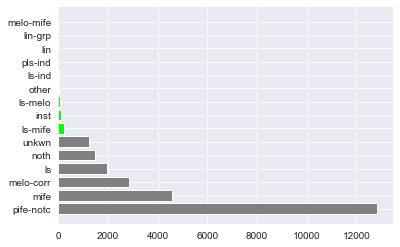

In [13]:
counts = overview_available_features[overview_available_features['lineshort'] == single_item_clicked]['ctn']
selected_features = overview_available_features[overview_available_features['lineshort'] == single_item_clicked]['feature']
clrs = ['lime' if (x != 0) else 'grey' for x in overview_available_features[overview_available_features['lineshort'] == single_item_clicked]['uploaded_ctn']]
plt.barh(selected_features, counts, color=clrs)
#axf1.set_title(single_item_clicked)

In [14]:
selected_features

71    pife-notc
72         mife
73    melo-corr
74           ls
75         noth
76        unkwn
77      ls-mife
78         inst
79      ls-melo
80        other
81       ls-ind
82      pls-ind
83          lin
84      lin-grp
85    melo-mife
Name: feature, dtype: object

## Chose: "All Features"

In [15]:
single_item_clicked = "All Features"

In [16]:
sum(overview_available_features['feature'].value_counts())

124

In [17]:
sum_all_features = overview_available_features.groupby('feature')['ctn'].sum()
sum_all_features_uploaded = overview_available_features.groupby('feature')['uploaded_ctn'].sum()

In [18]:
sum_all_features.index

Index(['coat-imp', 'crac', 'crac-c', 'crac-grp', 'inst', 'irre', 'lin',
       'lin-grp', 'ls', 'ls-crac', 'ls-feat', 'ls-ind', 'ls-lin', 'ls-melo',
       'ls-mife', 'ls-plin', 'melo', 'melo-corr', 'melo-mife', 'mife', 'noth',
       'other', 'pife-notc', 'plin', 'pls-ind', 'unkwn'],
      dtype='object', name='feature')

In [19]:
df_all_feature = {'feature': list(sum_all_features.index), 'ctn': list(sum_all_features), 'uploaded_ctn': list(sum_all_features_uploaded)}

In [20]:
df_all_feature = pd.DataFrame(df_all_feature)

In [21]:
df_all_feature

,feature,ctn,uploaded_ctn
0,coat-imp,1212,1212.0
1,crac,692,692.0
2,crac-c,25,25.0
3,crac-grp,23,23.0
4,inst,1241,1109.0
5,irre,45334,23.0
6,lin,438,438.0
7,lin-grp,30,30.0
8,ls,3080,143.0
9,ls-crac,38,38.0


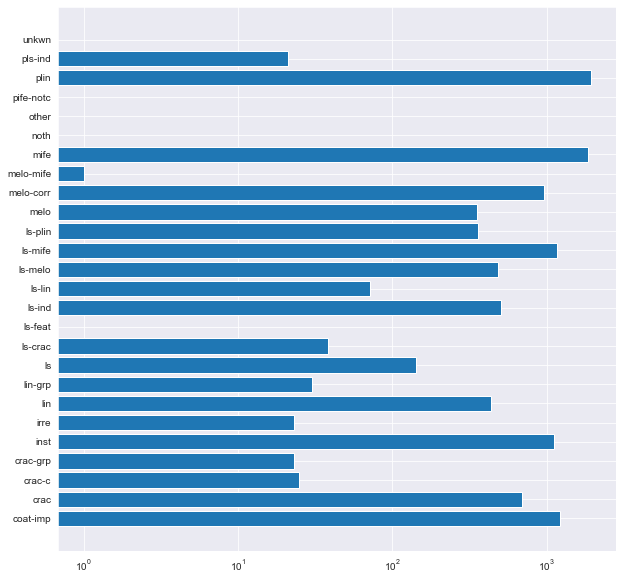

In [22]:
#plt.barh(df_all_feature['feature'], df_all_feature['ctn'], color=clrs)
#plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(figsize=(10, 10))
plt.barh(df_all_feature['feature'], df_all_feature['uploaded_ctn'])
ax.set_xscale('log')

In [ ]:
df_all_feature[df_all_feature['uploaded_ctn'] != 0 ]#['uploaded_ctn']

In [ ]:
clrs = ['lime' if (x != 0) else 'grey' for x in df_all_feature['uploaded_ctn']]

In [ ]:
clrs

In [ ]:
#plt.barh(df_all_feature['feature'], df_all_feature['ctn'], color=clrs)
#plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(figsize=(10, 10))
plt.barh(df_all_feature['feature'], df_all_feature['ctn'], color=clrs)
ax.set_xscale('log')

In [ ]:
df_all_feature

In [ ]:
figure_tmp_available_features.add_subplot(111)

In [ ]:
#plt.barh(df_all_feature['feature'], df_all_feature['ctn'], color=clrs)
#plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(figsize=(10, 10))
plt.barh(df_all_feature['feature'], df_all_feature['ctn'])
ax.set_yscale('log')

### Chose one single feature

In [ ]:
single_item_clicked = "pife-notc"

In [ ]:
df_single_item_clicked = overview_available_features[overview_available_features['feature'] == single_item_clicked]

In [ ]:
df_single_item_clicked

In [ ]:
overview_available_features[
                overview_available_features['feature'] == single_item_clicked]['uploaded_ctn']

In [ ]:
clrs = ['lime' if (x != 0) else 'grey' for x in overview_available_features[
                overview_available_features['feature'] == single_item_clicked]['uploaded_ctn']]

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 10))
plt.barh(overview_available_features[overview_available_features['feature'] == single_item_clicked]['lineshort'], 
         overview_available_features[overview_available_features['feature'] == single_item_clicked]['ctn'], color=clrs)
#ax.set_yscale('log')

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df1 = np.random.randint(0, 100, (50, 4))

In [ ]:
df2 = pd.DataFrame(data=df1, columns=['A', 'B', 'C', 'D'])

In [ ]:
df2